# An open-sourced comprehensive Monte-Carlo-aided educational toolkit for statistics

<hr/>

The Monte Carlo method provides an intuitive and promising didactic tool for probability and statistics-related courses. This paper introduces an open-sourced Python toolkit (pip install mc-tk). This toolkit, which contains three sub-modules. (1) The “mc.experiments” module provides simulations for classical numeric or probability problems, e.g., Buffon’s needle puzzle and the locker problem. (2) “mc.distributions” provides simulations to study commonly used distributions, e.g., exponential, Poisson, Zipf. For each MC experiment, both the observed histogram and theoretical density function are provided for comparison. (3) “mc.samplings” illustrates the sampling distribution of test statistics, e.g., the chi-squared statistic in the GOF test and ANOVA’s F statistic. Until now, mc-tk has been used in higher education courses for three years and was positively reviewed by both peer educators and undergraduate students.

## Install

In [ ]:
%matplotlib inline

## Functionality

experiments.py - provide simulations for solving numeric or probability problems, e.g., solving pi, calculating lottery expectations, etc.     
distributions.py - provide simulations for commonly used distributions, e.g., a sudden death game will produce the exponential distribution, the paper clip experiment will produce the zipf distribution, etc.     
samplings.py - used to verify the statistic / sampling distribution of commonly used hypothesis tests. e.g., the statistic of chi-squared GOF test follows the chisquare distribution. the statistic for ANOVA follows a F distribution, etc.

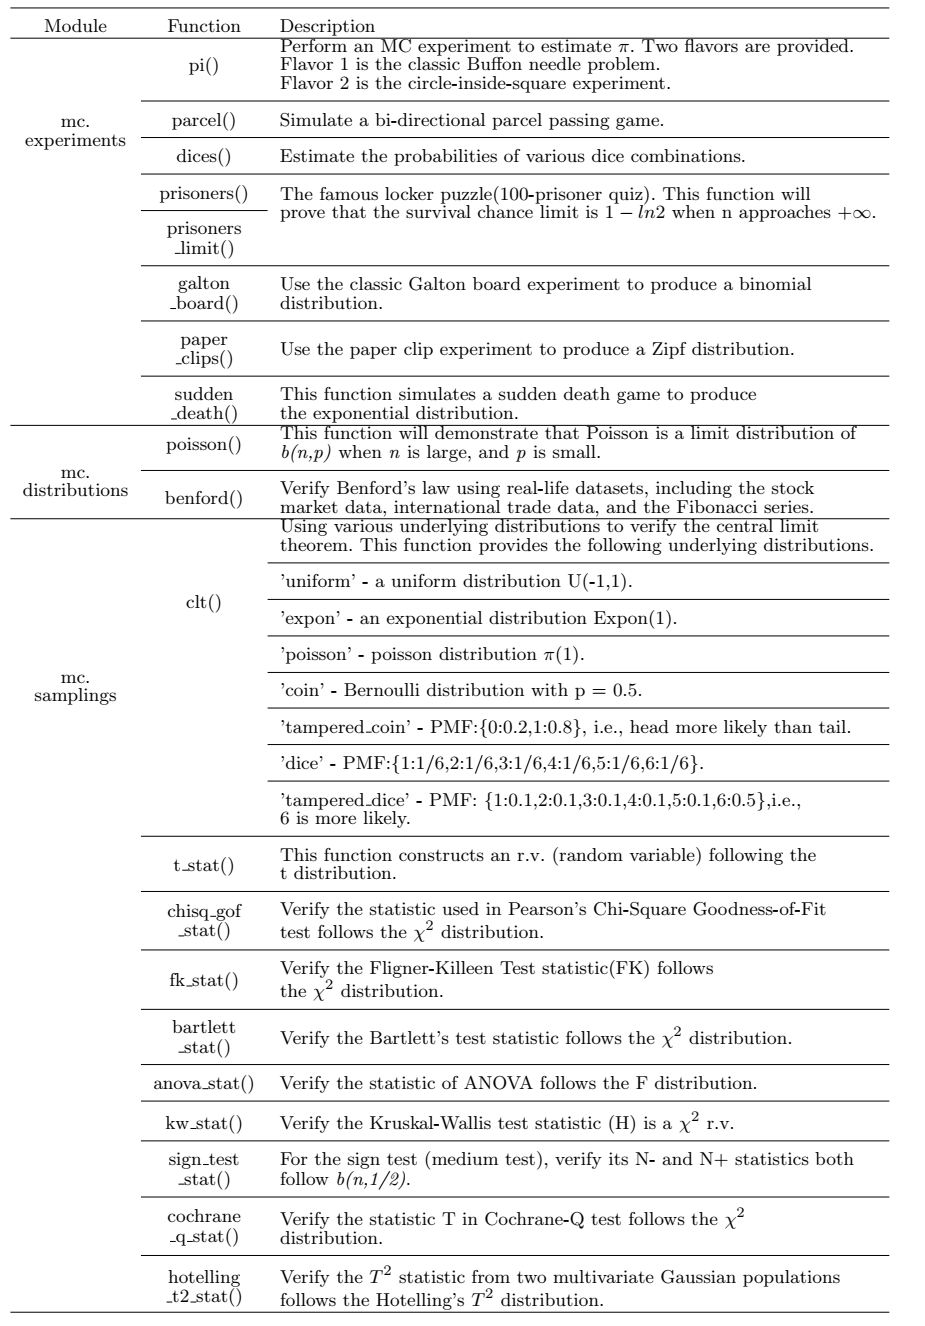

# 1. experiments.py

<div title = "The justification for a Monte Carlo method lies in the law of large numbers." />

## 1.1 estimate  $\pi$

<div title='pi_illustrate(N = 1000)'>
    
    flavor : 
        0 - the classic Buffon's needle problem.
        1 - circle inside square. N points (x,y) are drawn from uniform random distributions in the range of -1 to +1. 
    
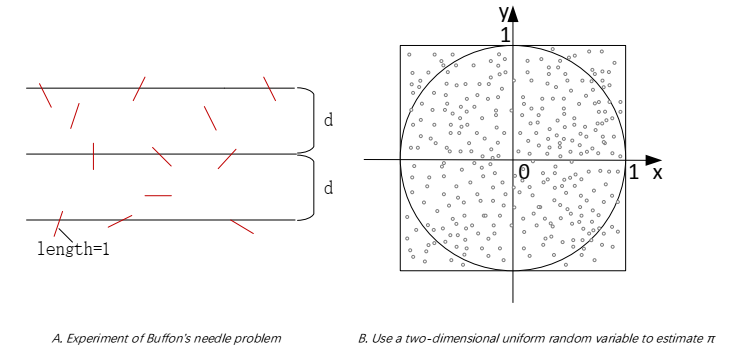

In [4]:
from mc import experiments
_ = experiments.pi(N = 100000000, flavor = 1)

ModuleNotFoundError: No module named 'mc'

## 1.2 Bi-directional Parcel Passing Game

The standard setting for this game is as follows.   
Five players (A, B, C, D, E) form a circle. In each round, the parcel holder can pass the parcel either to his/her left or to the right.   

The question is: after ten rounds, what is the probability of the parcel returning to the starter player?
<div style='display:none'>
A、B、C、D、E五个人围成圆圈进行传球游戏，规定每人只能传给相邻的人（向左传或向右传）。   
由A开始游戏。

问：传球10次后，球回到A手中的概率是多少？  
请使用Monte Carlo方法进行计算，并与经典概率计算法比较</div>

In [2]:
experiments.parcel(1000000,5,10)

0.247545

The theoretical solution / 经典概率解法：

$P = { { 2 + C_{10}^5 } \over { 2^ {10} } }= 24.8 \% $
        
The two results are very close. 两者值（近似）相同。仿真次数越多，值越相近。

## 1.2.1 All-directional Parcel Passing Game

This is Version II ball/parcel passing game.   
In this game setting, each player can pass the ball to ANY (not only left and right) other player.   

In [1]:
from mc import experiments
_ = experiments.parcel_v2(N = 100000, num_players = 3, num_ops = 3)

Affinity matrix:
 [[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
Affinity matrix powered by num_ops(3): 
[[2. 3. 3.]
 [3. 2. 3.]
 [3. 3. 2.]]
Probability = 0.25
MC frequency = 24935/100000 = 0.24935


## 1.3 Dice Game

The dice() function simulates the dice game in the Japanese manga Kaiji: The Ultimate Gambler.  
投掷3个色子。得分表如下：

|  Result  |     Reward ($)     |
|----------|:-------------:|
| 456 |  16  |
| 123 |  16  |
| ooo 三个相同 <br> Triple, or Three of a Kind (e.g., 4 4 4)  |  8  |
| oox 两个相同 <br/> Pair (e.g., 4 4 3) |  2  |
| xyz 各不相同 <br/> Single (e.g., 1 2 6) |  0  |

The question is:   
What is the mathematical expectation of the reward? In other words, what will be a fair price for each game if you are the casino boss?   
计算各情况的概率，并确定单次的票价。

In [3]:
dict_pmf = experiments.dices(N = 100000)

,ooo,123,456,xyz,oox
Experimental Frequencies (f)N = 100000,0.0273,0.0276,0.02775,0.49955,0.4178
Theoretical PMF (p),0.02778,0.02778,0.02778,0.50021,0.41667


In [4]:
# math expectation
dict_rewards = {'ooo': 8,
 '123': 16,
 '456': 16,
 'xyz': 0,
 'oox': 2}

E = 0
for key in dict_rewards:
    E = E + dict_pmf[key] * dict_rewards[key]
    
print('Mathematical expectation of the reward =', E)

Mathematical expectation of the reward = 1.9396


Math expectation = 1.94. The ticket price must > 1.94. 3 or 4 dollars is preferred.

<hr/>

We can use 'scipy multinomial' to calcuate the theoretical probability of '123' and '456'. It is very close to MC result.

In [5]:
from scipy.stats import multinomial
rv = multinomial(3, [1/6]*6)
rv.pmf([1, 1, 1, 0, 0, 0]) # 123 或 456 的情况

0.02777777777777777

## 1.4 Locker Puzzle

The hundred-prisoner puzzle or the locker puzzle was first addressed by Danish scientist Peter Bro Miltersen (Gál and Miltersen 2007) (Warshauer and Curtin 2006). In this puzzle, there are 100 lockers containing No.1 to No.100. In each round, one prisoner will open 50 lockers. The game will continue if his/her number is found inside any of the opened lockers. Otherwise, the game is over, and all prisoners will be executed. The prisoners cannot communicate with each other during the game.   

What are the best strategy and best survival probability?

在某个法制不健全的国家， 监狱中有编号1到100的100名死刑犯。监狱长给了他们最后一次机会：

一个房间里有100个抽屉，监狱长随意地把1到100这100个号码放入1号到100号抽屉中，每个抽屉一张。囚犯们逐个进入房间，每人可以任意打开50个抽屉，之后关上。如果每名囚犯都在这50个抽屉中发现了他的号码，那么所有的犯人都会被赦免；如果有人没有找到他的号码，那么所有的囚犯都会被处死。在第一个囚犯进入房间之前，囚犯们允许一起讨论开抽屉的“策略”，但一旦第一个囚犯进入房间，他们之间就被禁止交流。

如果纯粹随机开抽屉，那么所有人都被赦免的概率只有 $ (1/2) ^{100} $ 。

The best strategy is the circular chain. ), i.e., the prisoner first opens the locker of his or her number, then opens the locker whose number is inside the last locker. With this strategy, the survival probability equals the probability of creating circular chains no longer than 50.

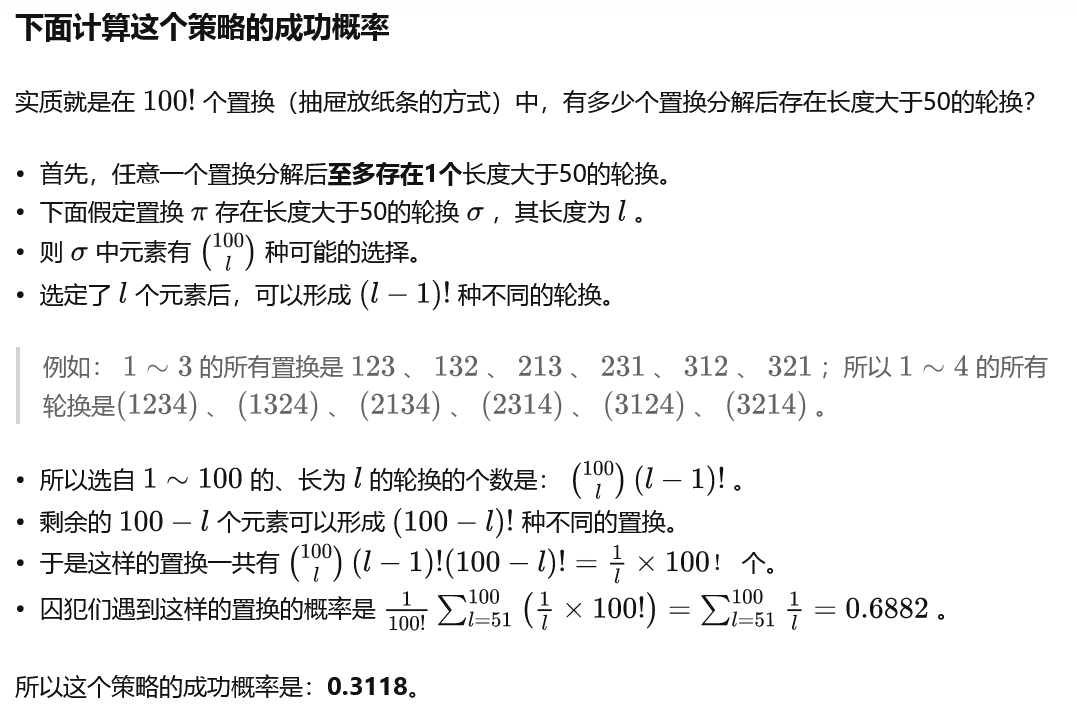

In [6]:
experiments.prisoners(n = 100, N = 10000)

0.3164

It is very close to the theoretical value (0.3118).  
We can further investigate how prisoner number affects the survival chance.  

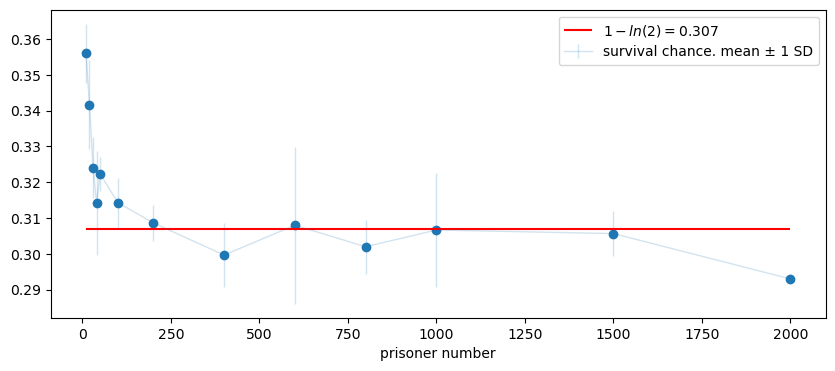

In [7]:
experiments.prisoners_limit(ns = [10, 20, 30, 40, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000], repeat = 3, SD = 1) # there is still noticeable fluctuations. users may try much bigger N to get stable result, but beware the run time may explode.

## 1.5 binom dist - Galton Board 二项式分布 - 高尔顿钉板实验

Use `experiments.galton_board` to simulate 20 nail layers and 21 grooves. Run 10,000 simulations.     
钉板上有20层钉板、21个落槽，请使用Monte Carlo算法求解球落入各个槽的概率(模拟1万次)。

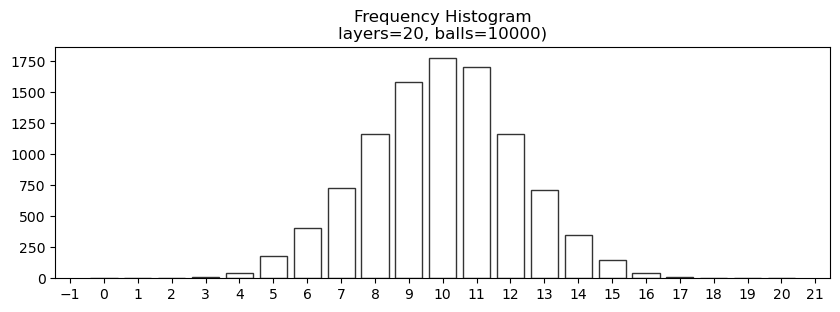

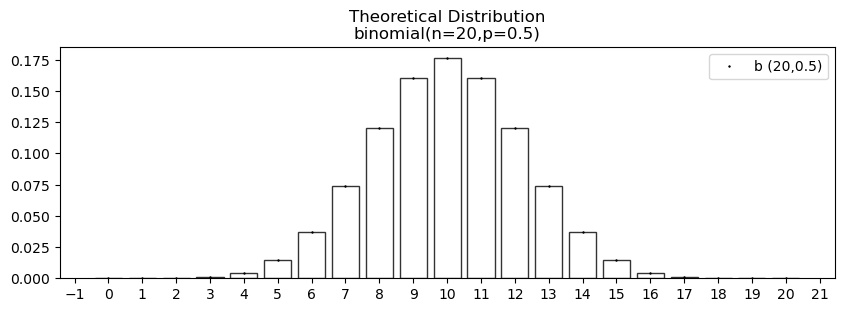

In [8]:
_ = experiments.galton_board(num_layers = 20, N = 10000, flavor=1)

Theoretical PMF 经典概率解法：
$P(i) = {{ C_{L}^i } / { 2^L }}, i = \text { 0 to L } $, L is nail layer num. L 为钉板层数

<hr/>

## 1.6 Expon dist - Survial Game 指数分布 - 生存游戏

$X \sim Expon(\theta) $

PDF(概率密度函数)：

$ f(x; \theta) = \left\{
  \begin{array}{lr}
    {1 \over \theta} e ^{-x/\theta}, x>0\\
    0, else
  \end{array}
\right. $


元器件寿命为何符合指数分布？  
定义一个survival game（即每回合有p的死亡率；或电容在单位时间内被击穿的概率）的概率计算函数survival_dist。
取p = 0.001（每回合很小的死亡率），绘制出pmf曲线（离散、等比数组）

In mc-tk, we define a survival game to illustrate the underlying mechanism of the exponential distribution. Because the sudden death game can approximate many real-life accidents or electronic component failures (e.g., capacity breakdown or LCD pixel defect), the resulting exponential distribution can be used in survival analysis and lifespan estimation.
In each round of this survival game, the test subject (player) is faced with a very low sudden death probability (p). 

We choose p = 0.001 and simulate 10,000 MC rounds. The generated histogram is very close to the exponential distribution. This function can be used to illustrate the generation mechanism of the exponential distribution.


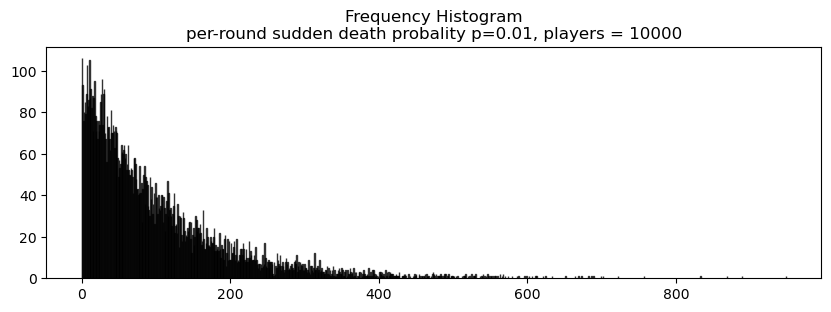

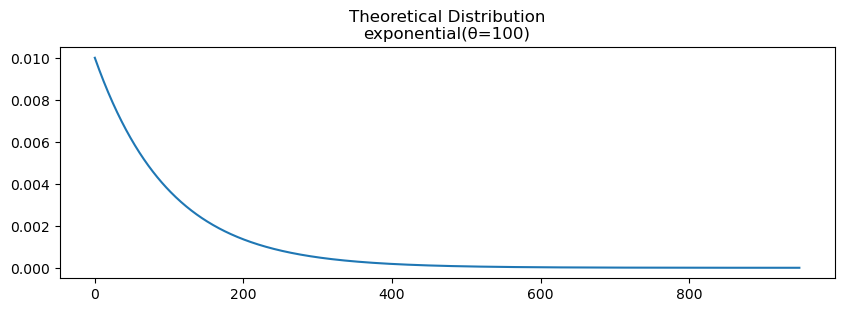

In [9]:
experiments.sudden_death(num_rounds = 1000, p = 0.01, N = 10000)

# 1.7 Zipf Dist - The Paper Clip Experiment

The Zipf law was proposed by George Kingsley Zipf in 1949 from his linguistic research (Kanwal, Smith, Culbertson, and Kirby 2017). The Zipf law says that a word’s frequency in natural language is inversely proportional to its rank. This means only a few words are frequently used, and most are seldom used. This phenomenon is known as the 80/20 law, the long tail distribution, or the Pareto principle.

由哈佛大学的语言学家乔治·金斯利·齐夫（George Kingsley Zipf）于1949年发表的实验定律。它可以表述为：在自然语言的语料库里，一个单词出现的频率与它在频率表里的排名成反比。  
二八定律、长尾定理、长尾分布、帕累托分布等

回形针试验：每次随机抽取两个，连接在一起后放回

The probability mass function for zipf is:

$f(k,a) = \frac{1}{\zeta(a)k^a}$
for $k\geq1,a >1$

zipf takes a > 1 as shape parameter.$\zeta$ is teh Riemann zeta function(scipy.special.zata)

$\zeta(x) = \sum_{n=1}^{\infty}(\frac{1}{n^x}) = \sum_{n=1}^{\infty}n^{-x}$

$\zeta(x) = \frac{1}{1^x}+\frac{1}{2^x}+\frac{1}{3^x}+\frac{1}{4^x}+...$

...

$\zeta(1) = \frac{1}{1}+\frac{1}{2}+\frac{1}{3}+\frac{1}{4}+...=+\infty$


$\zeta(2) = \frac{1}{1^2}+\frac{1}{2^2}+\frac{1}{3^2}+\frac{1}{4^2}+...=\frac{\pi^2}{6}$


$\zeta(-1) = 1+2+3+4+...=-\frac{1}{12}$


$\zeta(-2) = 1^2+2^2+3^2+4^2+...=0$

$\zeta(s) = \frac{1}{\Gamma(s)}\int_{0}^{\infty}\frac{x^{s-1}}{e^x-1}dx$

最后一个为复数域的解析延拓

$\zeta(s) = \frac{1}{(1-\frac{1}{2^s})(1-\frac{1}{3^s})(1-\frac{1}{5^s})(1-\frac{1}{7^s})...}$

$\zeta(s) = \prod\frac{1}{1-\frac{1}{p^s}}$,p是质数


The MC experiment related to the Zipf distribution is the paper clip experiment. Each time, we drew two clips from a pipe of paper clips. The picked clips are connected and then put back. After enough rounds, the clip chains of different lengths will obey the Zipf distribution. Users may call the paper_clips() function to simulate this experiment

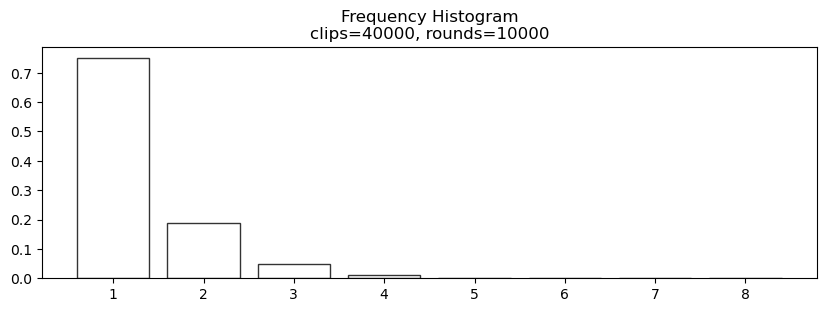

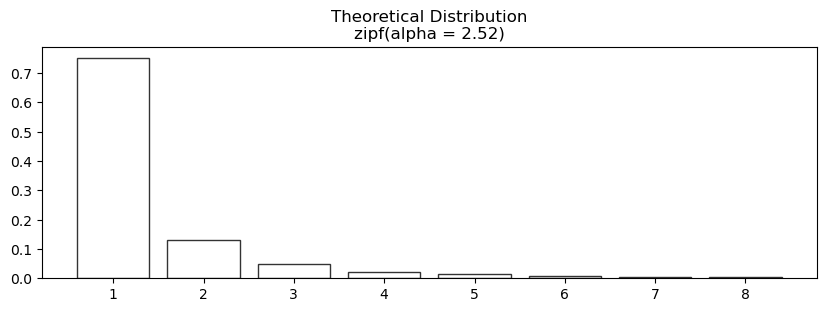

In [10]:
experiments.paper_clips(num_rounds = 10000, num_clips = 40000)

<br/><hr/></br>

# 2. distributions.py


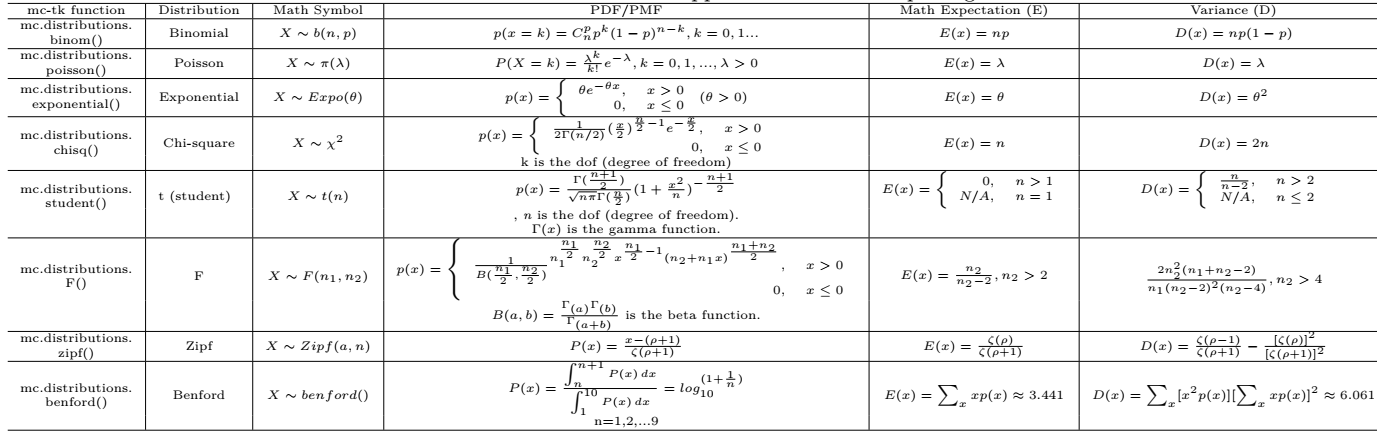

## 2.1 Poisson Dist 泊松分布

    possion 是 b(n,p), n很大，p很小的一种极限分布
    假设一个容量为n的群体，每个个体发生特定事件（如意外或事故）的概率为p（极低），那么总体发生事件的总数近似符合泊松
    
The Poisson distribution has the following PMF:P (X = k) = λk e−λ, k = 0, 1, ..., λ > 0. Many daily-life events follow the Poisson distribution, e.g., the car accidents that happen each day, the patient visits in the emergency department, etc. The Poisson distribution can be seen as a particular case of the binomial distribution when p is very low and n is very large. 

We demonstrates the poisson() function in mc-tk. In each MC round, a large sample size (n = 10000) is used, and each individual is faced with an extremely low accident probability (p= 0.0001). By simulating 100000 MC rounds, we can see that the total number of accidents follows a perfect Poisson distribution.

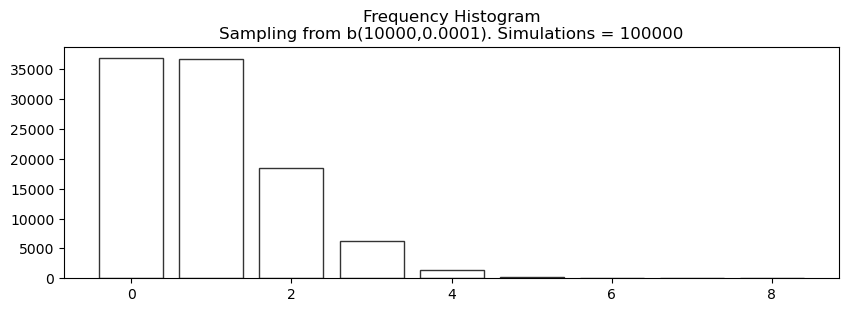

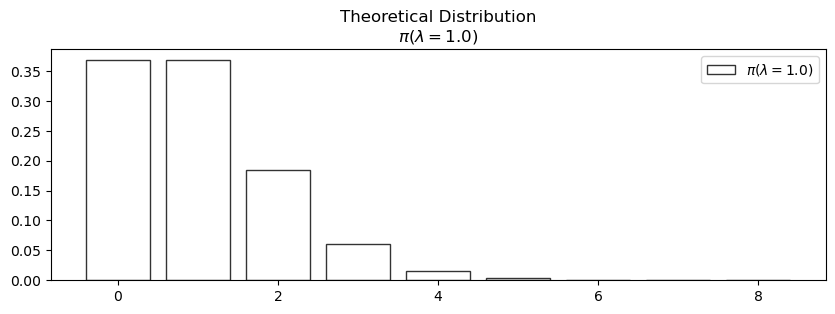

In [11]:
from mc import distributions
distributions.poisson()

## 2.2 Benford's law

Also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small.

本福特定律揭示了十进制数据的一个统计学规律，即首位数字出现的概率为：

|  | | | | | | | | | |
|---|---|---|---|---|---|---|---|---|---|
| k  |  1  | 2 	| 3 |	4 |	5 |	6 |	7 |	8 |	9 |
| p | 30.1% |	17.6% |	12.5% 	|9.7% |	7.9% 	| 6.7% | 	5.8% |	5.1% |	4.6% |

“It applies to a wide variety of data sets, including electricity bills, street addresses, stock prices, population numbers, death rates, lengths of rivers, physical and mathematical constants, and processes described by power laws (which are very common in nature).”

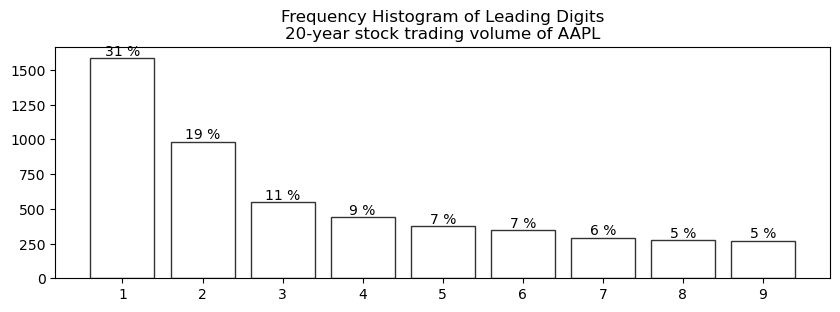

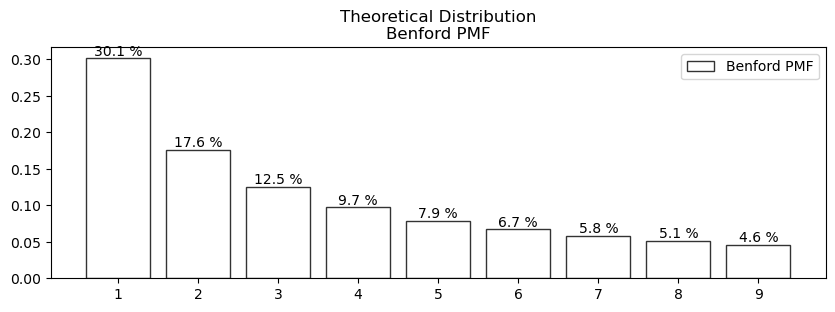

In [12]:
from mc import distributions
distributions.benford('stock')

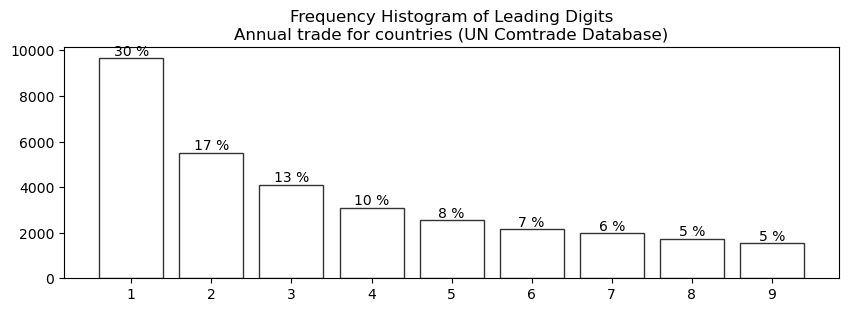

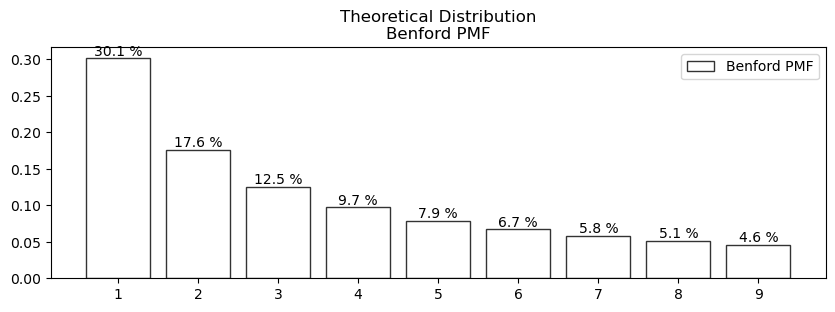

In [13]:
distributions.benford('trade')

The fibonacci series represents how a population (e.g., rabbits) grows in a resource-unlimited environment.   
In intuitive explanation of why it follows Benford: at a steady breeding speed, it takes much longer time from 1000 to 2000 (need to increase by 1000) than from 900 to 1000 (only need to increase by 100). Therefore, it stays longer at leading digit 1 than other digits.

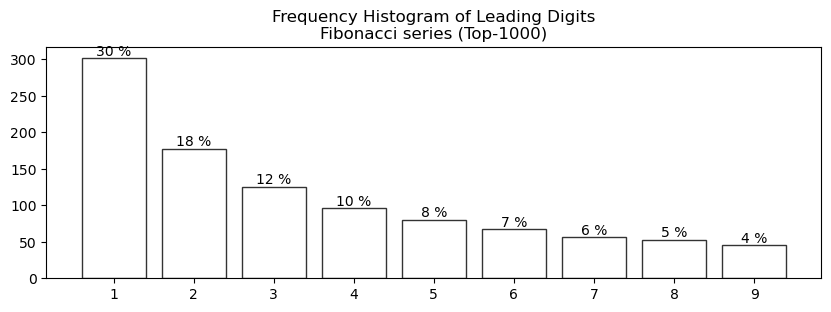

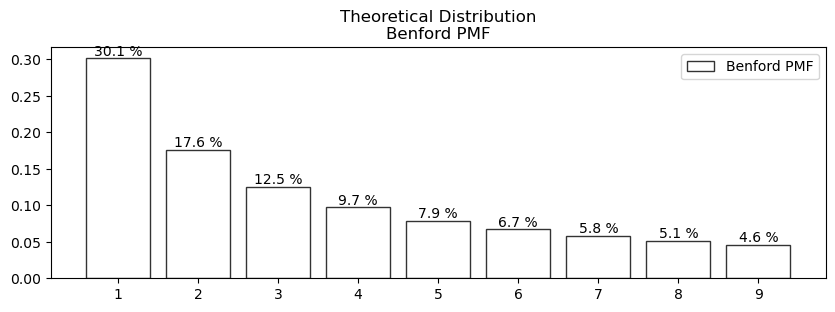

In [14]:
distributions.benford('fibonacci', N = 1000)

<hr/>

# 3. samplings.py 抽样分布及假设检验统计量的分布试验

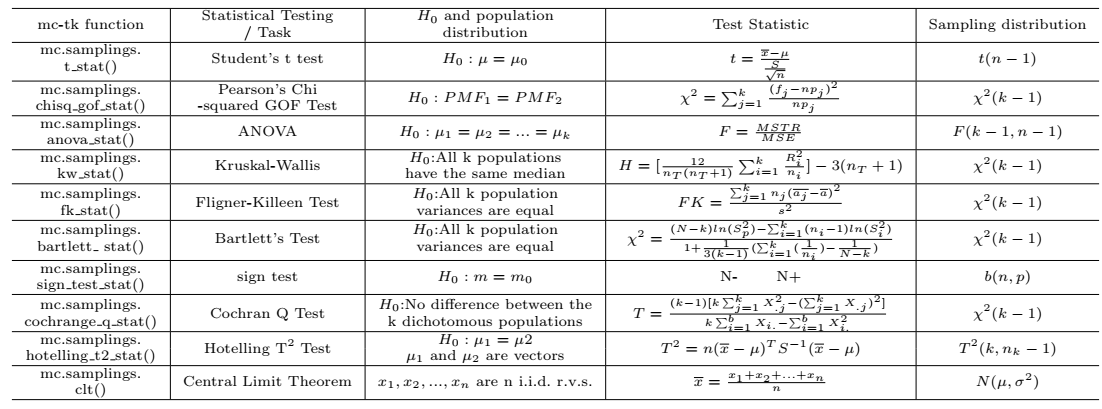

## 3.1 中心极限定理 CLT

----------- uniform -----------


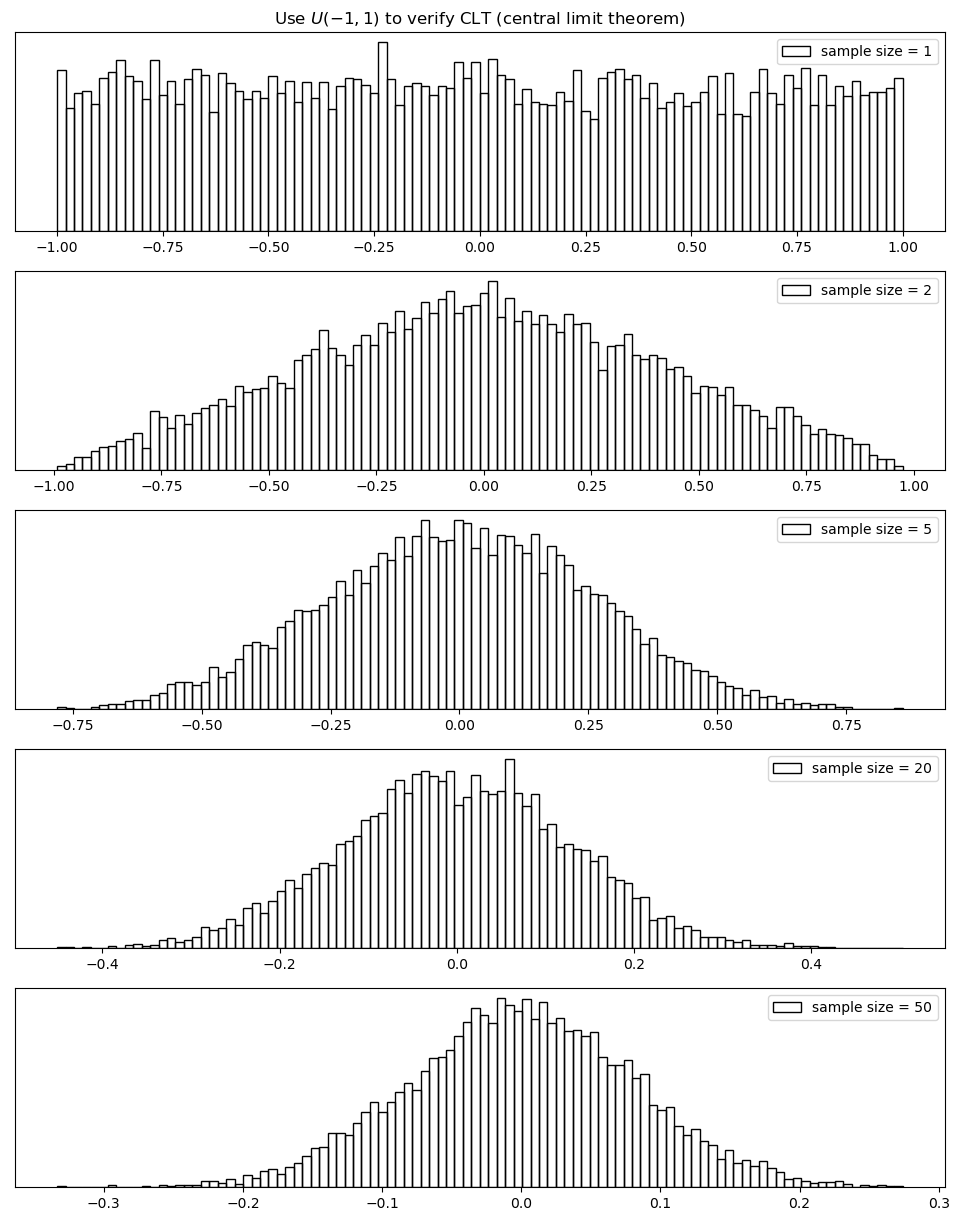

----------- expon -----------


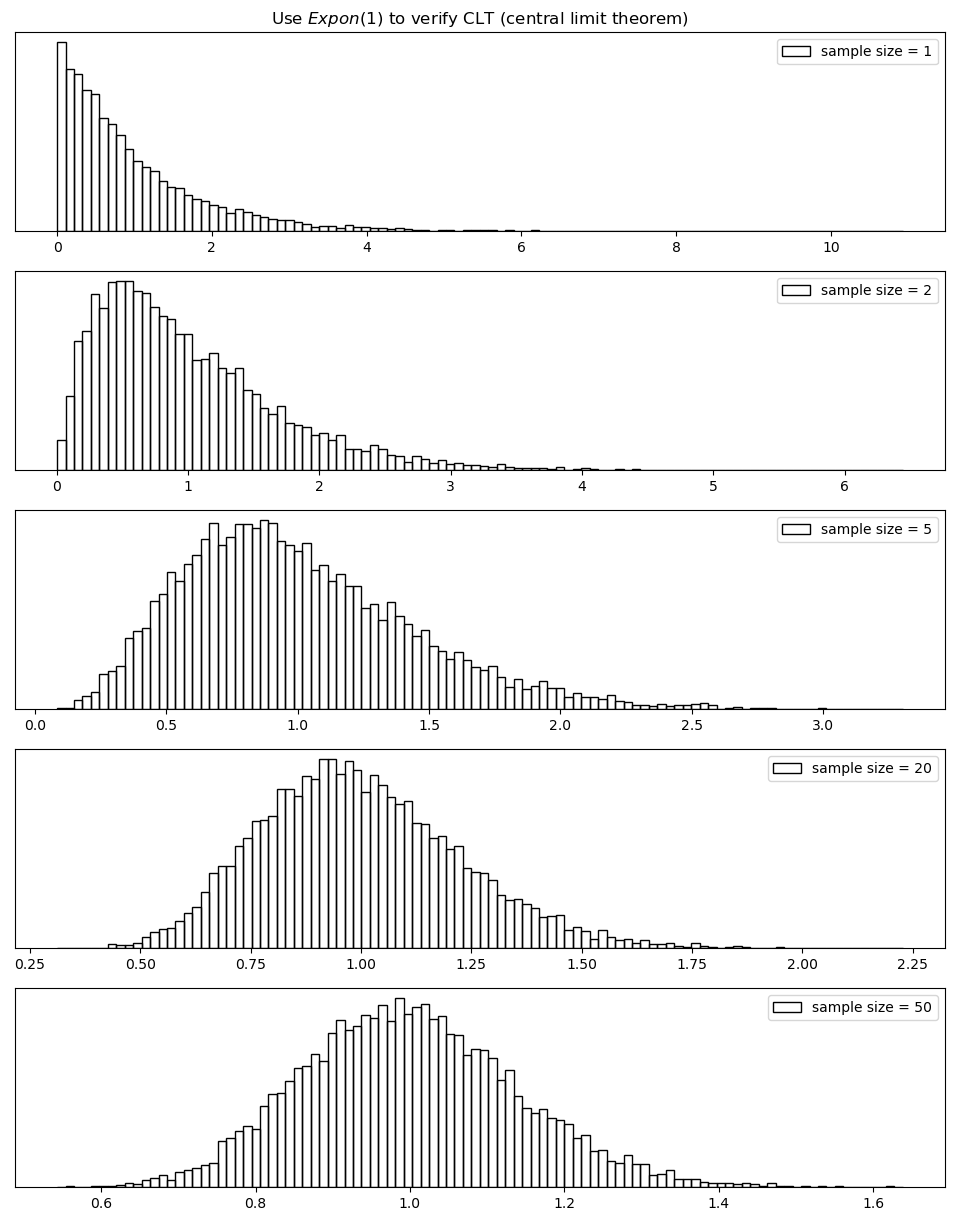

----------- poisson -----------


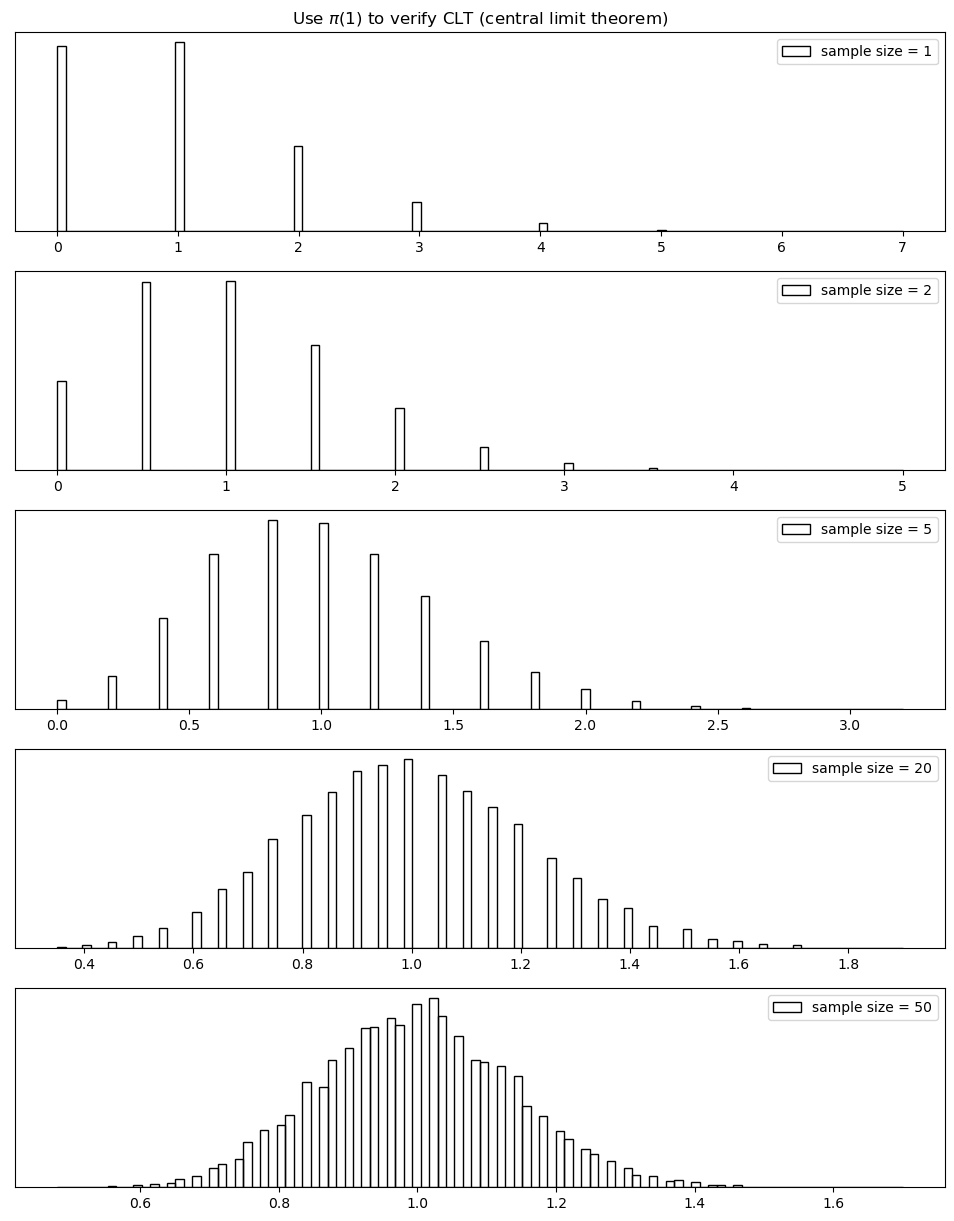

----------- coin -----------


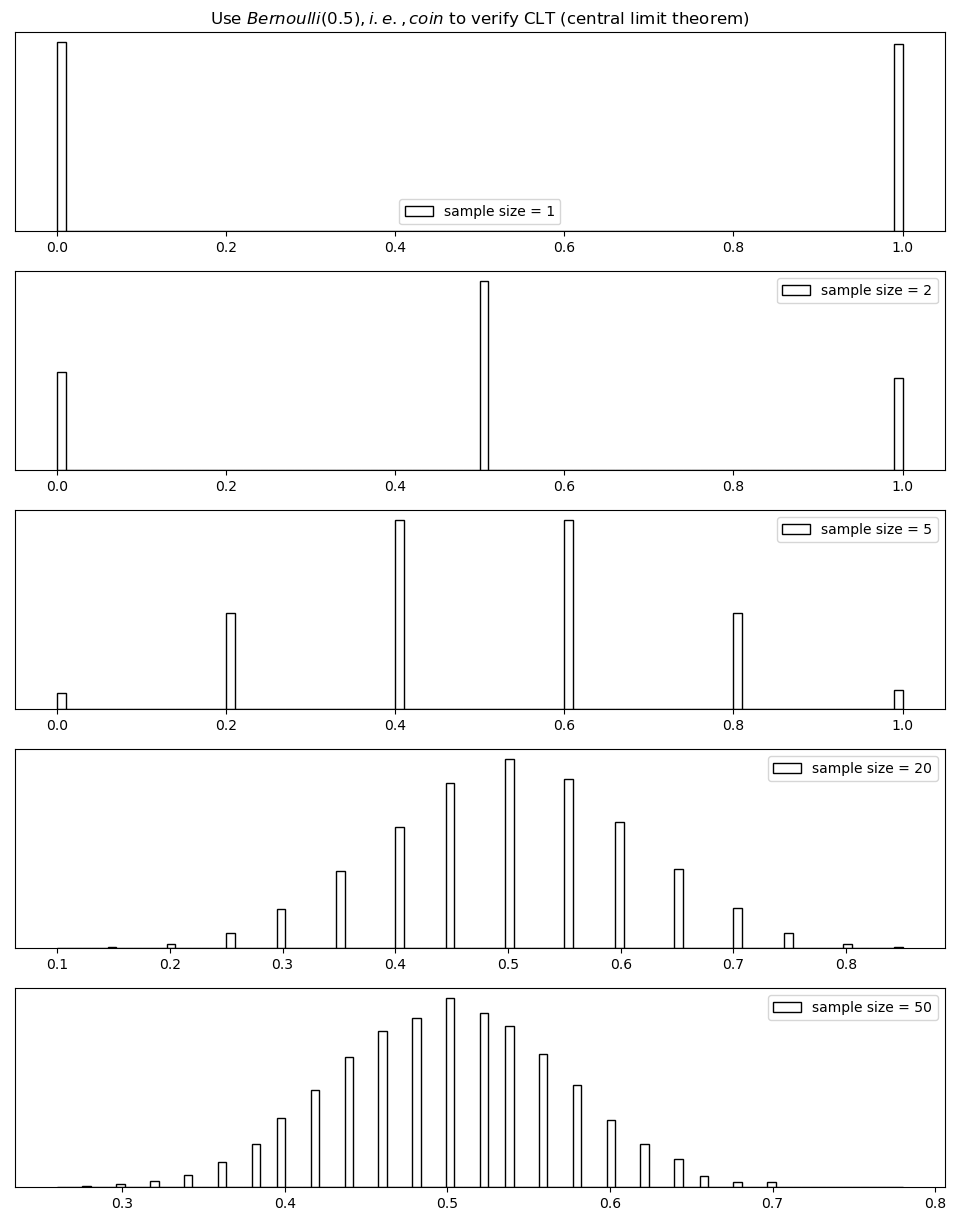

----------- tampered_coin -----------


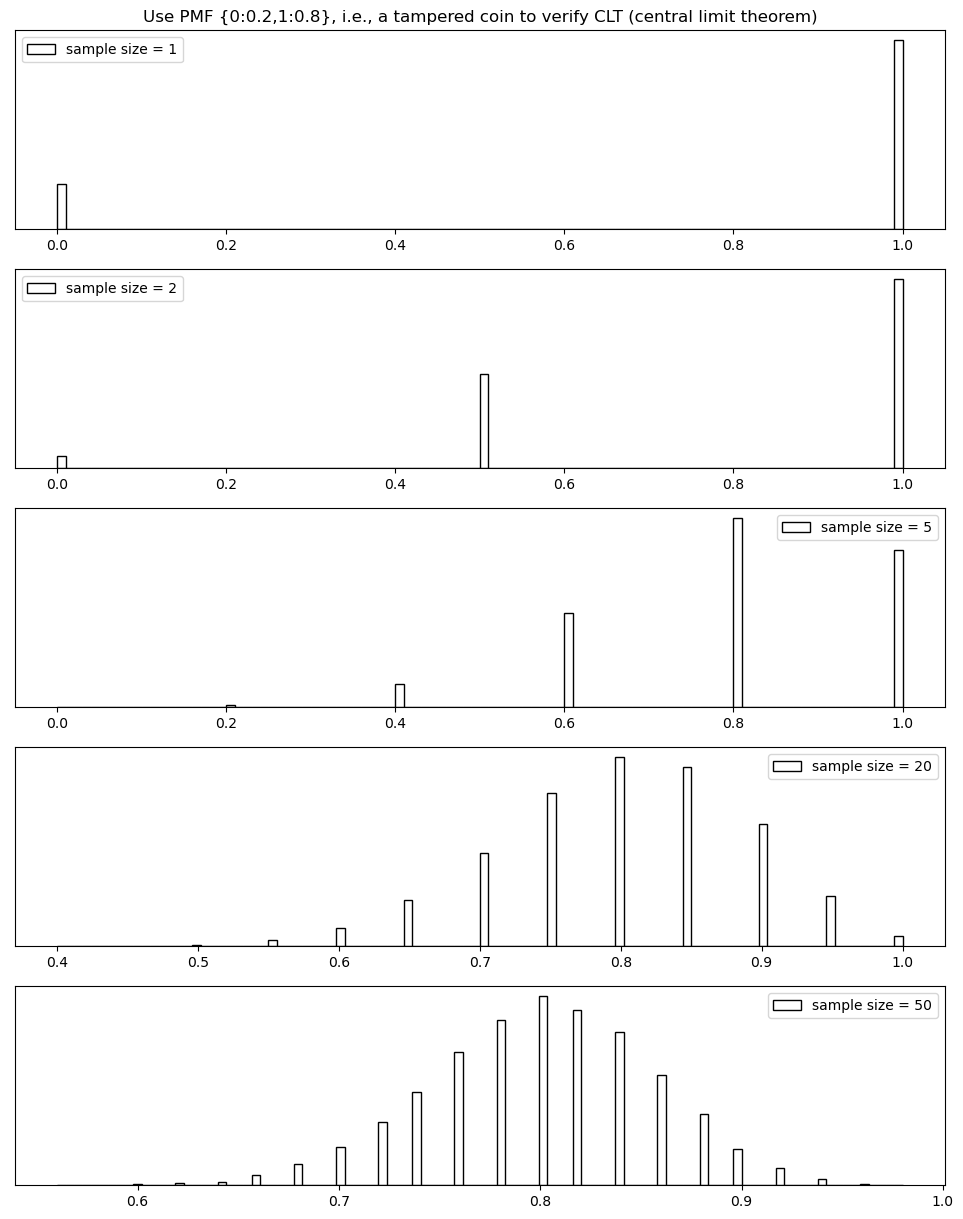

----------- dice -----------


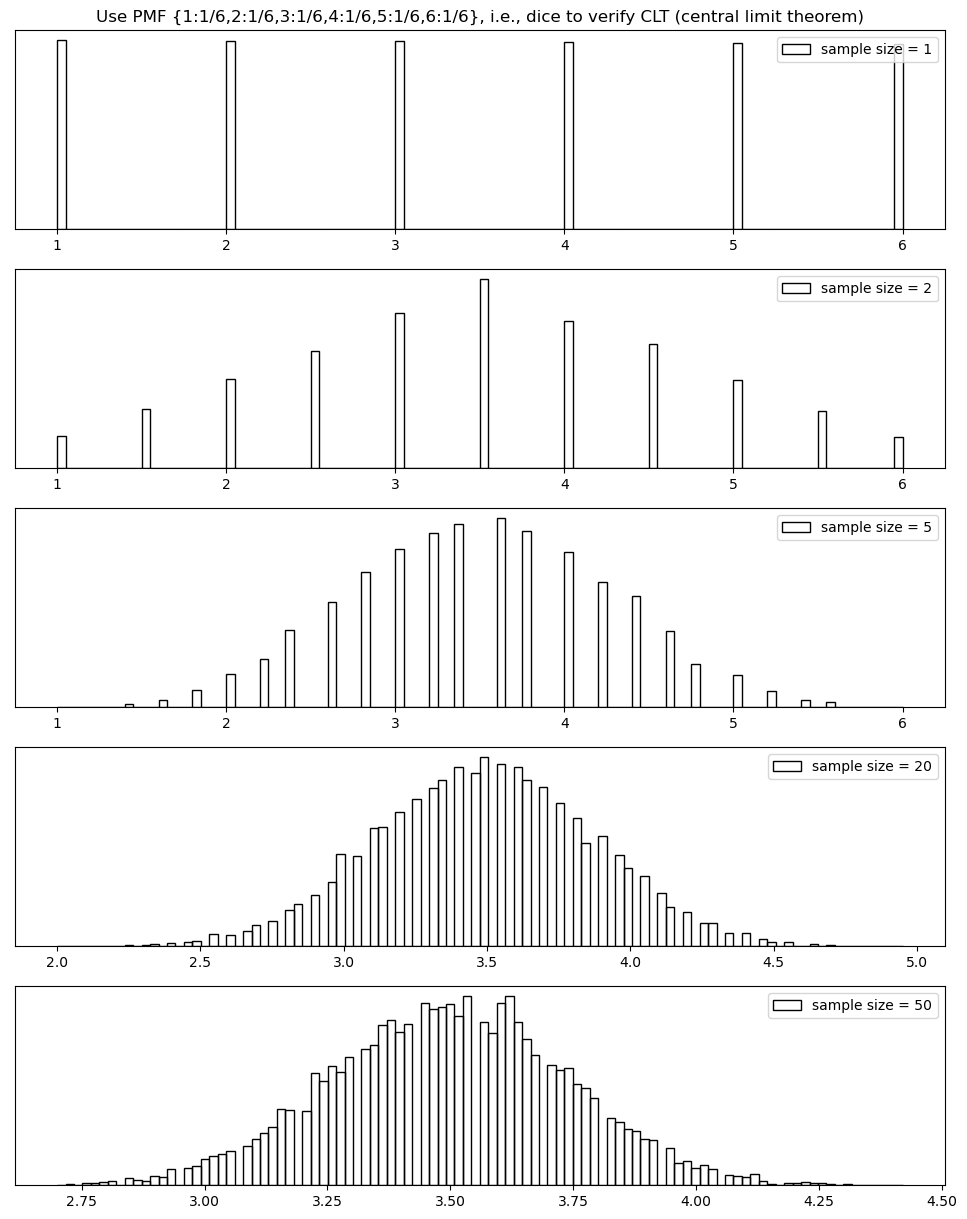

----------- tampered_dice -----------


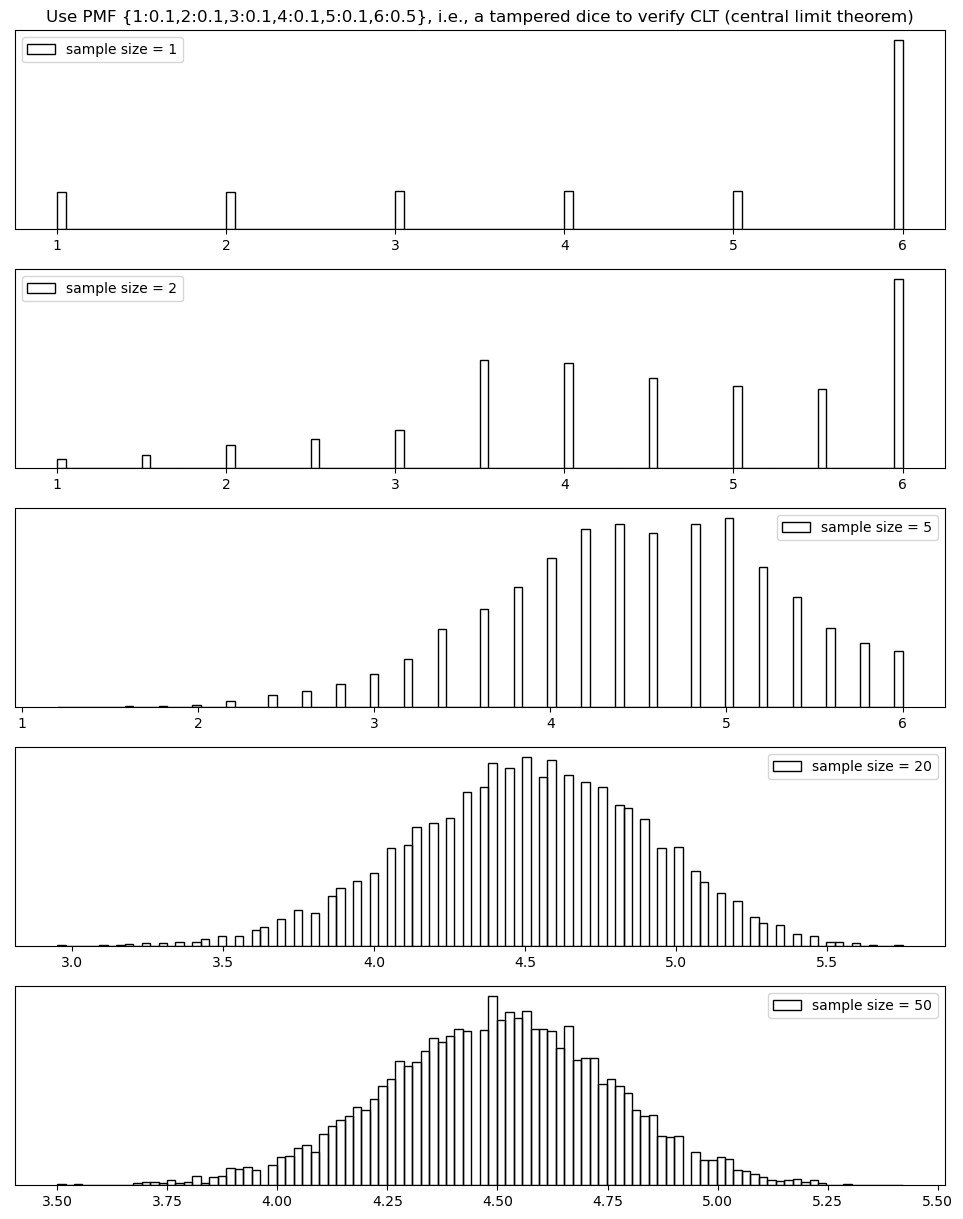

In [15]:
from mc import samplings

for dist in ['uniform', 'expon', 'poisson', 'coin', 'tampered_coin', 'dice', 'tampered_dice']:
    print('-----------', dist, '-----------')
    samplings.clt(dist, sample_size = [1,2,5,20,50], N = 10000)

## 3.2 验证 Pearson's Chi-Square Goodness-of-Fit Test

We will verify the test statitisc in Pearson’s GOF test follows the chi-square sampling dist.   

皮尔逊卡方拟合优度检验有一个基本的卡方分布假设，即

$\chi^2 = \sum_{j=1}{k}\frac{(f_{j}-np_{j})^2}{np_i} \sim \chi^2(k-1)$

当n充分大($n \geq 50$)时，$\chi^2$近似服从$\chi^2(k-1)$分布。

Because Pearson’s chi- square GOF test is non-parametric, there is no restriction on the population distribution. chisq_gof_stat() provides two MC experiment settings. (1) The first is the Galton board (use the binominal population, 3.2.1). (2) The second is the dice game (use the uniform PMF, 3.2.2). In both cases, the statistic histogram from the MC experiment is very close to the theoretical χ2(k − 1) distribution.


### 3.2.1. `dist = 'binom'` 用高尔顿钉板实验 b(n,p) 来验证

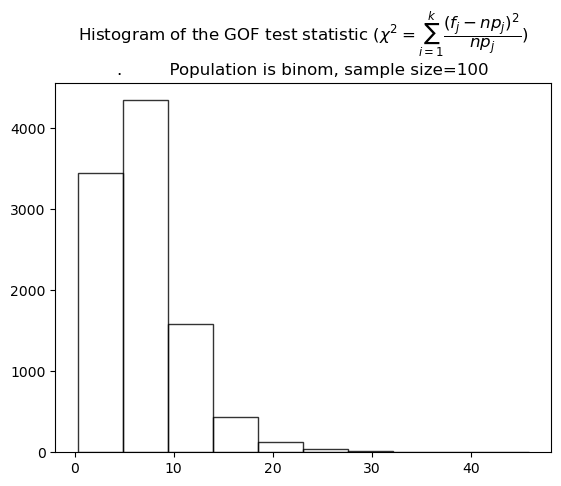

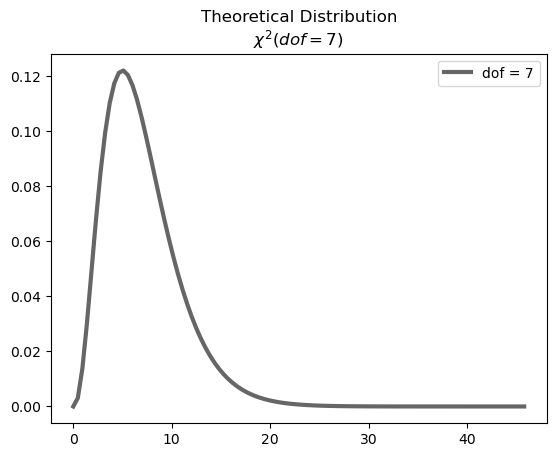

In [16]:
samplings.chisq_gof_stat(dist = 'binom', K = 8, sample_size = 100, N = 10000)

### 3.2.2.  `dist = 'dice/uniform'` 色子实验验证

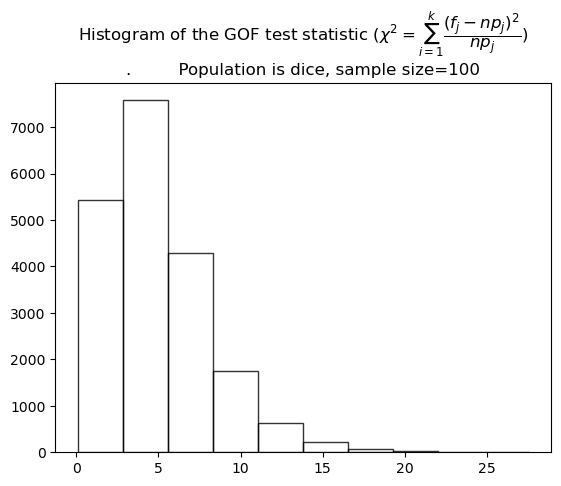

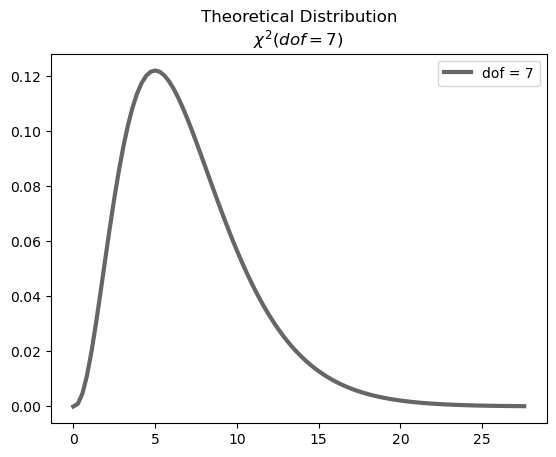

In [17]:
samplings.chisq_gof_stat(dist = 'dice', K = 8, sample_size = 100, N = 10000)

-------
How to construct a chisq r.v.?

Suppose $X_1,X_2,...,X_n$ are i.i.d.r.v.s following $N(\mu,\sigma^2)$, then $\chi^2 = \frac{1}{\sigma^2}\sum_{i=1}^{n}(X_{i}-\mu)^2\sim\chi^2(n)$.

    The squared sum of [k] r.v.s. from standard normal distributions is a chisq statistic.
    This function will verify it via [N] MC experiments.
    [k]个 N(0,1)^2 r.v.s. 的和为一个卡方分布的统计量
The pdf of the $\chi^2$ distribution with k(usually a positive whole number) degrees of freedom:
$f(x) = \frac{x^{\frac{k}{2}-1} e^\frac{-x}{2}}{2^\frac{k}{2} \Gamma(k/2)}$  for x $\geq$ 0.

## 3.3 验证正态总体均值检验的t分布假设

In `samplings.t_stat()`, we sample n samples from a normal distribution, the statistic will follow the student's distribution.

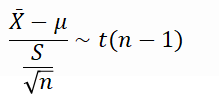

------
How to construct a t r.v.?

假设 $X\sim N(0,1),Y\sim\chi^2(n)$, 且X与Y相互独立，则称变量 $t = \frac{X}{\sqrt{Y/n}}$ 所服从的分布为自由度为n的t分布。

We provide another funciton `distribution.student()` to sample from this random variable ($t = \frac{X}{\sqrt{Y/n}}$) and compare it with the theoretical t distribution 

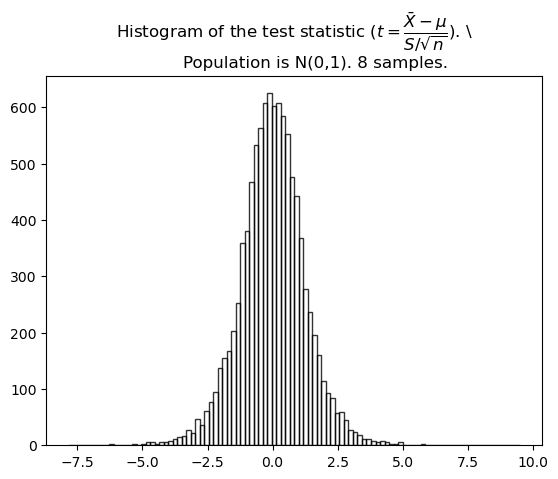

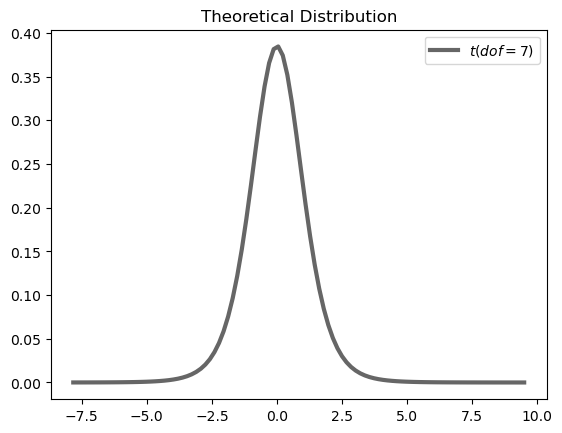

In [18]:
from mc import samplings
samplings.t_stat(n = 8, N = 10000)

## 3.4 验证 ANOVA的F分布假设

The `samplings.anova_stat()` function draws samples from multi-group normal populations and verify its statistic:  

F = MSTR/MSE ~ F(k-1, n-k)


-----
About the F Distribution

定义：设$U \sim \chi^2(n_1),V \sim \chi^2(n_2)$,$U$与$V$相互独立，则称随机变量:
         
$F = \frac{U/n_1}{V/n_2}$

服从自由度为$n_1$及$n_2$的F分布，$n_1$称为第一自由度，$n_2$称为第二自由度，记作$F \sim F(n_1,n_2)$
           
由定义可见，$\frac{1}{F} = \frac{V/n_2}{U/n_1} \sim F(n_2,n_1)$

The `distributions.F()` function draws samples from the above F random variable ($F = \frac{U/n_1}{V/n_2}$) and compares it with the theoretical distribution

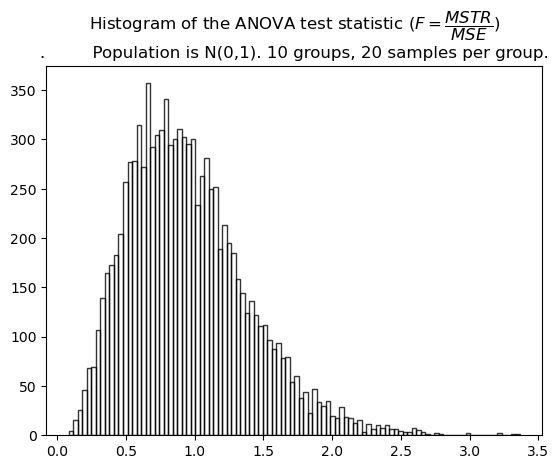

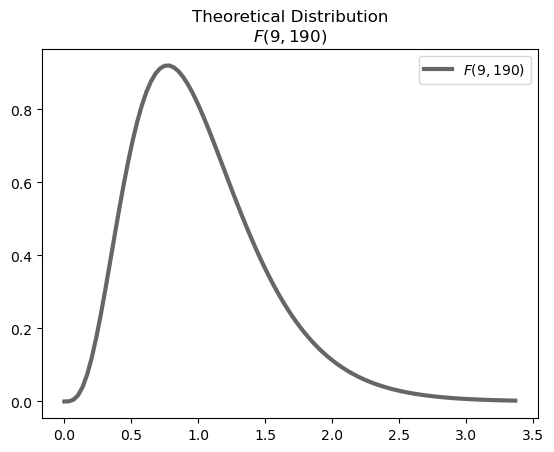

In [19]:
samplings.anova_stat(K = 10, n = 20, N = 10000)

## 3.5 Median Test

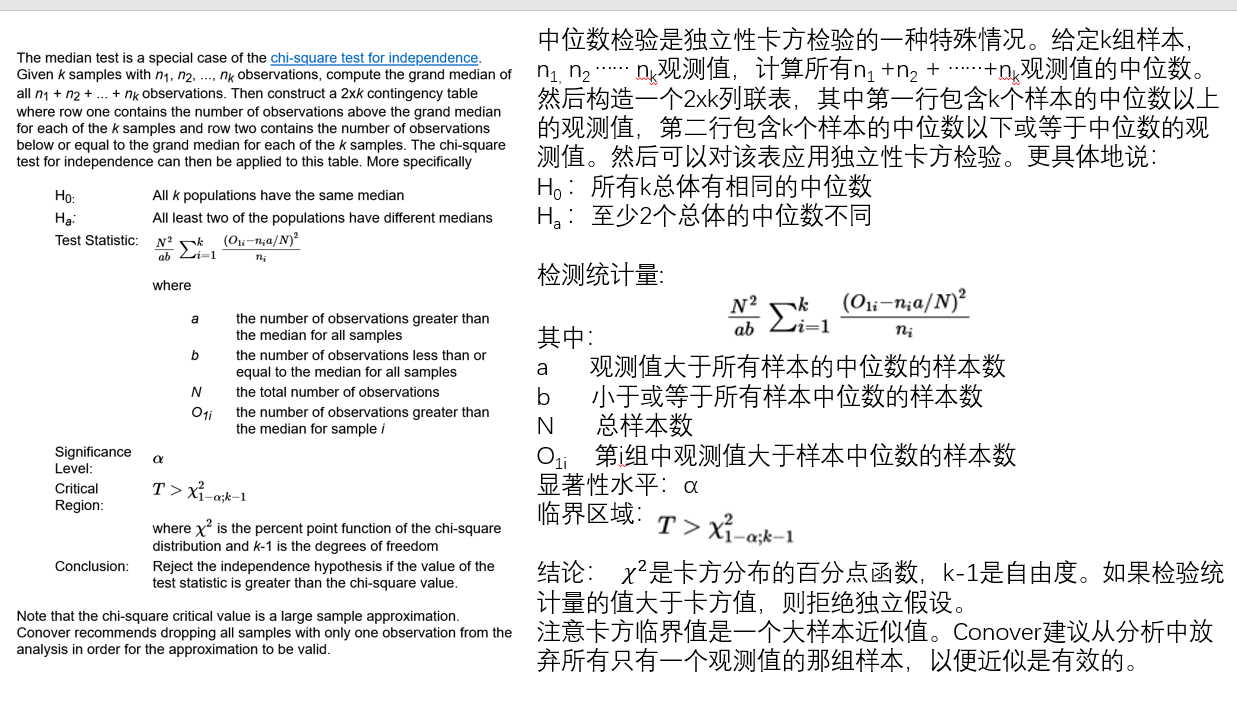

The median test is a special case of the chi-square test for independence.Given K samples with $n_{1}, n_{2}, .... n_{k}$ observations, compute the grand median of all $n_{1}+n_{2}+....+n_{k}$ observations. Then construct a $2xk$ contingency table where row one contains the number of observations above the grand median for each of the $K$ samples and row two contains the number of observations below or equal to the grand median for each of the $K$ samples. The chi-square test for independence can then be applied to this table. More specifically

$H_{o}$: All k populations have the same median

$H_{a}$: All least two of the populations have different medians

Test Statistic: $MT = \dfrac{N^2}{ab}\sum_{i=1}^{k}\dfrac{(O_{1i}-n_{i}a/N)^2}{n_{i}}$

where

$a$ = the number of observations greater than the median for all samples

$b$ = the number of observations less than or equal to the median for all samples

$N$ = the total number of observations

$O_{1i}$ = the number of observations greater than the median for sample i


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:59<00:00, 55.71it/s]


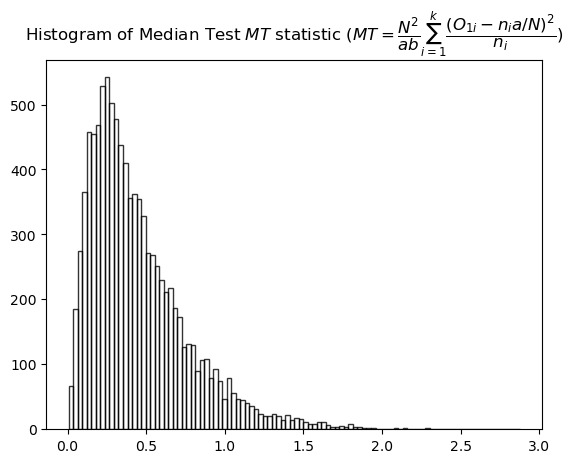

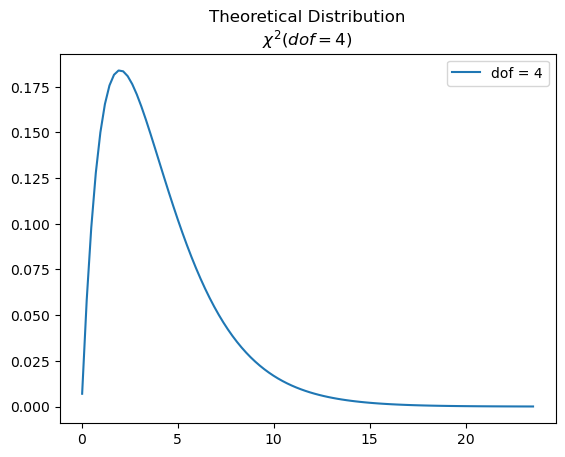

In [20]:
samplings.median_stat()

## 3.6 Kruskal-Wallis test

The Mann-Whitney or Wilcoxon test compares two groups while the Kruskal-Wallis test compares 3.  
Kruskal-Wallis test is a non-parametric version of one-way ANOVA. It is rank based.  
Kruskal-Wallis H: a X2 test statistic.

$H = [{\dfrac{12}{n_{T}(n_{T}+1)}\sum_{i=1}^{k}\dfrac{R_{i}^2}{n_{i}}]-3(n_{T}+1)}$

$K$=number of populations

$n_i$=the number of observations in sample i

$n_T$=$\sum_{i=1}^{k}n_i$=the total number of observations in all samples

$R_i$=the sum of the ranks for sample
 
可以用MC检验，3组N(0,1) 或 U(0,1)总体 或 其它分布，相等观察数   
The following uses U(0,1) to verify H follows X2

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8650.04it/s]


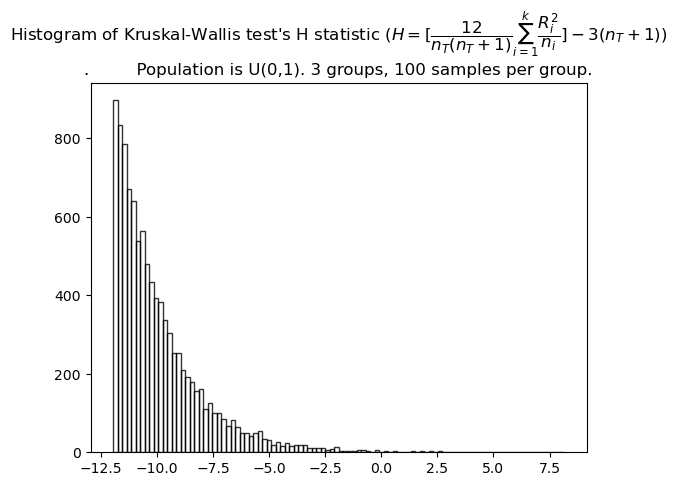

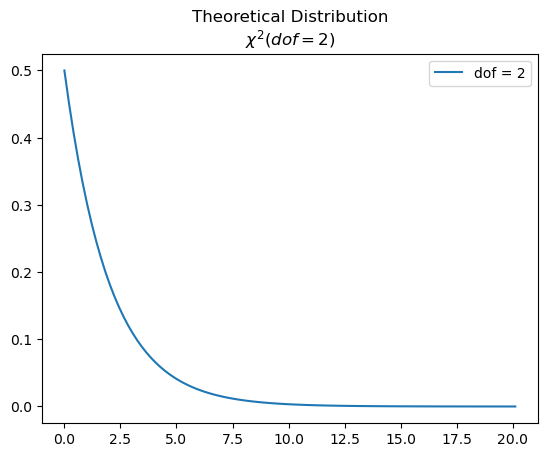

In [21]:
samplings.kw_stat()

## 3.7 Sign Test符号检验

统计量符合二项式分布

1. Calculate $X_i - m_0$  for i = 1,2,...,n.
2. Define $N-$ = the number of negative signs obtained upon calculating $X_i - m_0$  for i = 1,2,...n.
2. Define $N+$ = the number of positive signs obtained upon calculating $X_i - m_0$  for i = 1,2,...n.

Then, if the null hypothesis is true, that is, $m=m_0$,then $N-$ and $N+$ both follow a binomial distribution with parameters $n$ and $p = 1/2$. That is: 

$N- \sim b(n,\frac{1}{2})$ and $N+ \sim b(n,\frac{1}{2})$

Use Expon dist to verify:

$0.5 = \int_{m}^{-\infty}f(x)dx$

The theoretical median is m = $ \theta ln(2) $

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 60102.71it/s]


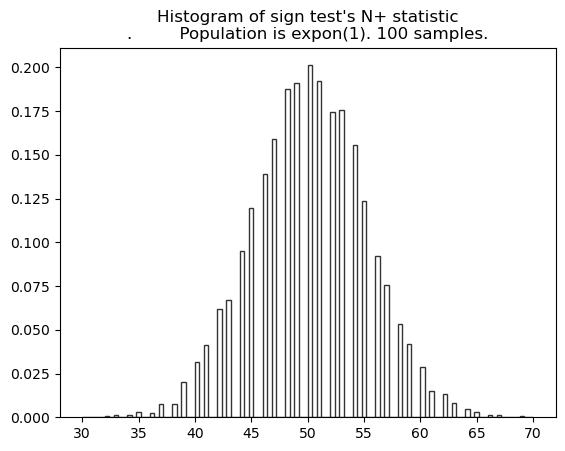

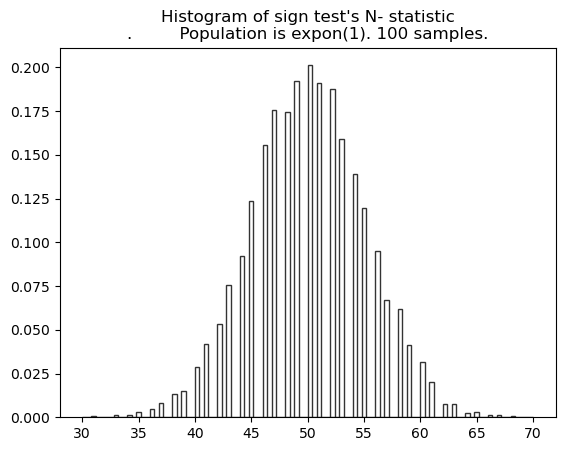

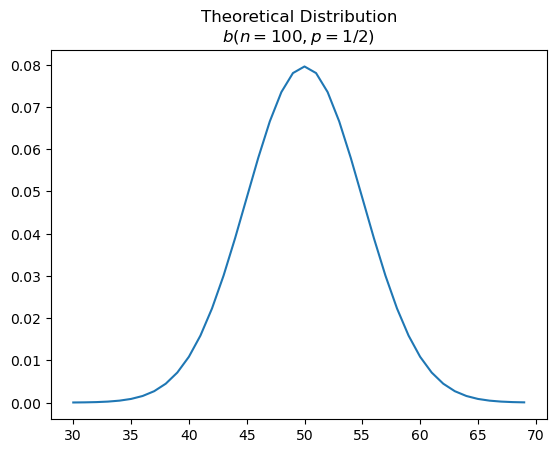

In [22]:
samplings.sign_test_stat(dist = 'expon', n = 100, N = 10000)

## 3.8 Cochrane-Q 统计量的卡方抽样分布

Cochran Q Test - A extension to McNemar Test

Null Hypothesis($H_0$): The proportion of "successes" is the same in all group.

$T = \dfrac{(k-1)[k\sum_{j=1}^{k}X_{.j}^2-(\sum_{j=1}^{k} X_{.j})^2]}{k\sum_{i=1}^{b}X_{i.}-\sum_{i=1}^{b} X_{i.}^2}$

where:

$k$: The number of treaments (or "groups")

$x_{.j}$:The column total for the $j^{th}$ treatment

$b$: The number of blocks

$x_{i.}$:The row total for the $i^{th}$ block

$N$:The grand totral

The test statistic $T$ follows a Chi-Square distribution with k-1 degreee of freedom.

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 21368.38it/s]


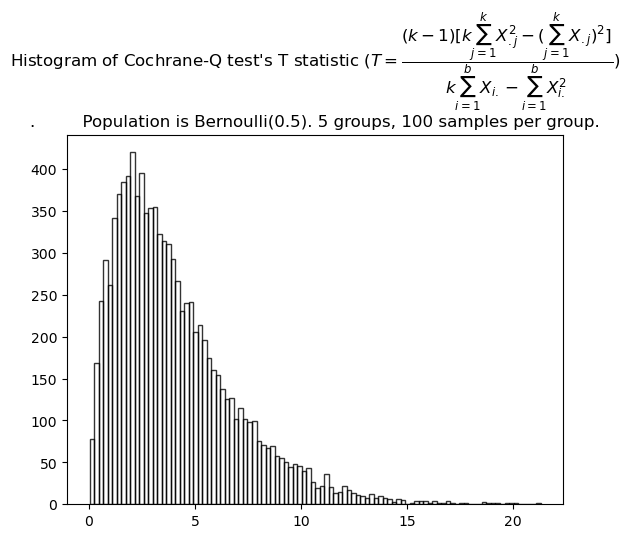

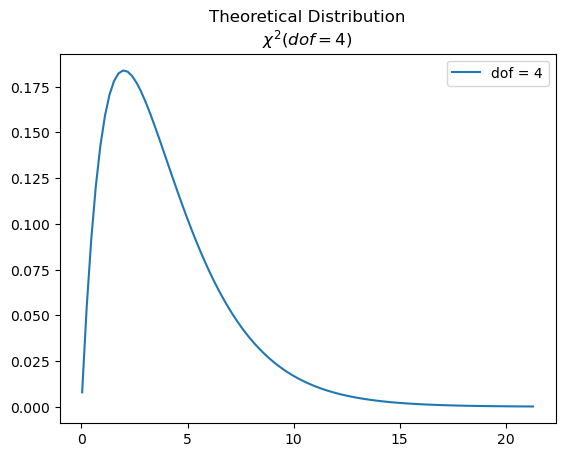

In [23]:
samplings.cochrane_q_stat(p = 0.5, K = 5, n = 100, N = 10000)

## 3.9  Hotelling's T2 统计量  

https://encyclopediaofmath.org/wiki/Hotelling-T%5E2-distribution

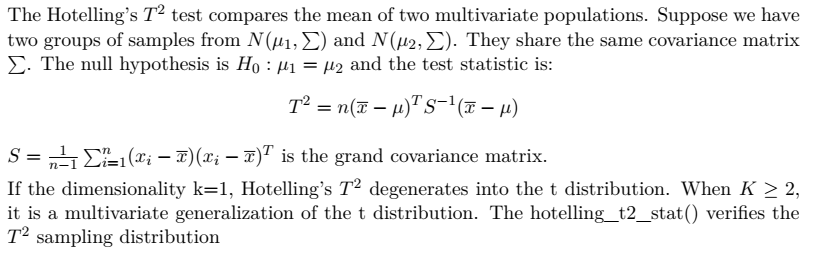

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 765.19it/s]


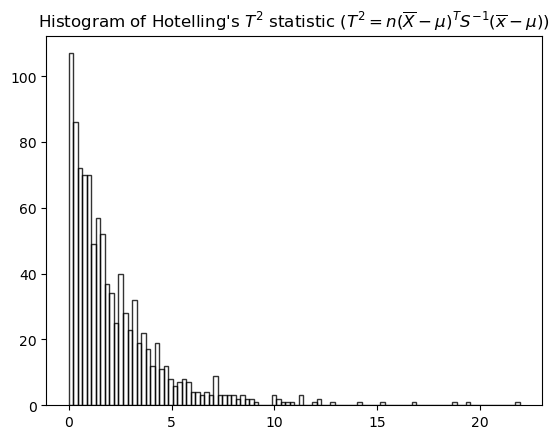

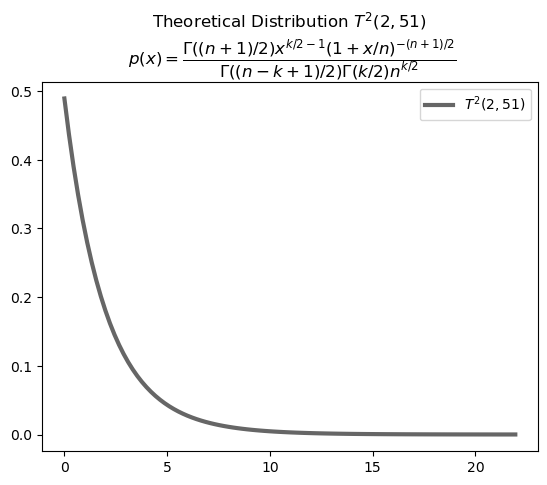

In [24]:
samplings.hotelling_t2_stat()

## 3.10 Fligner-Killeen test

There are several solutions to test for the equality (homogeneity) of variance across groups, including:

    F-test
    Bartlett’s test
    Levene’s test
    Fligner-Killeen test
    
    
The Fligner-Killeen test is a non-parametric test for homogeneity of group variances based on ranks. It is useful when the data are non-normally distributed or when problems related to outliers in the dataset cannot be resolved. It is also one of the many tests for homogeneity of variances which is most robust against departures from normality.
We now calculate the Fligner Killeen statistic using the formula 

$FK = \dfrac{\sum_{j=1}^{k}n_{j}(\overline{a_{j}}-\overline{a})^2}{s^2}$

where:
$k$ = the number of groups

$n_j$ = the size of the jth group

$\overline{a_{j}}$ = the mean of the normalization values for the $j^{th}$ group

$\overline{a}$ = the mean of all the normalization values

$s^2$ = the variance of all the normalization values

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2368.28it/s]


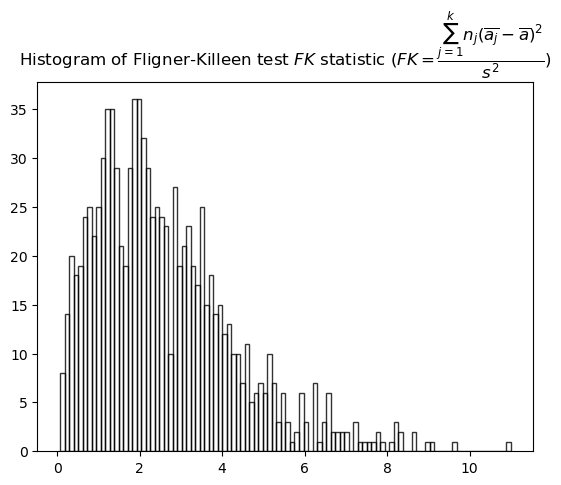

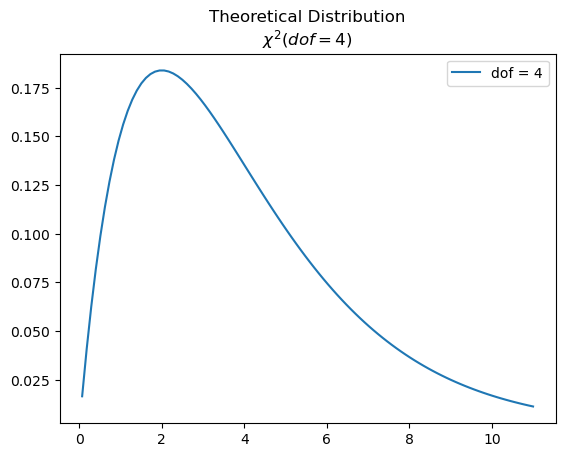

In [25]:
samplings.fk_stat()

## 3.11 Bartlett's Test

In statistics, Bartlett's test, named after Maurice Stevenson Bartlett, is used to test homoscedasticity, that is, if multiple samples are from populations with equal variances. Some statistical tests, such as the analysis of variance, assume that variances are equal across groups or samples, which can be verified with Bartlett's test. 

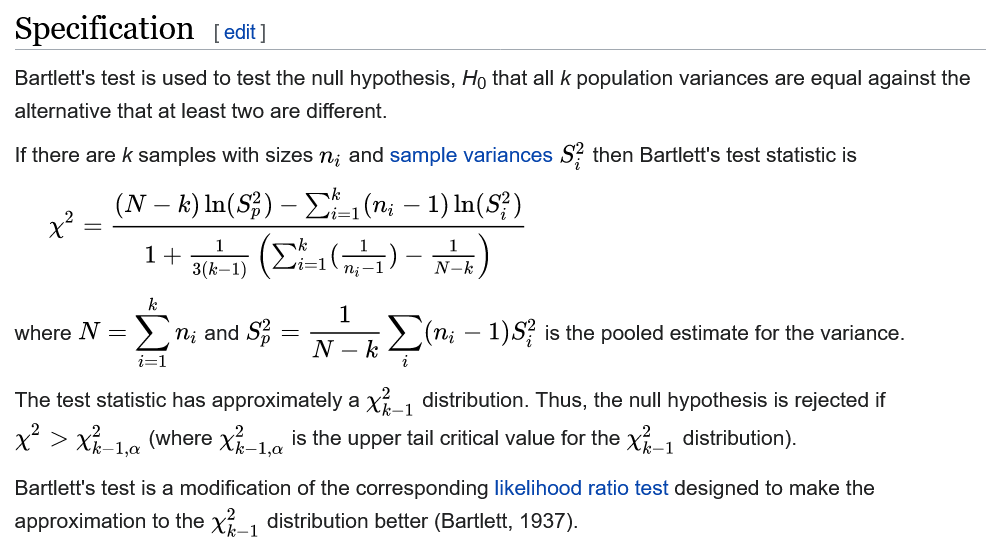

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21986.07it/s]


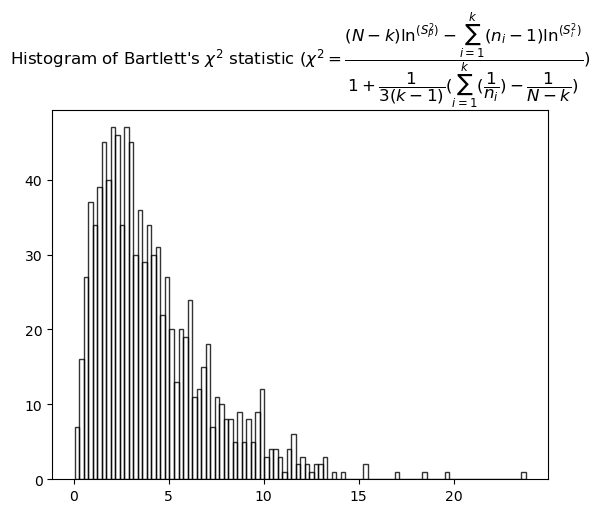

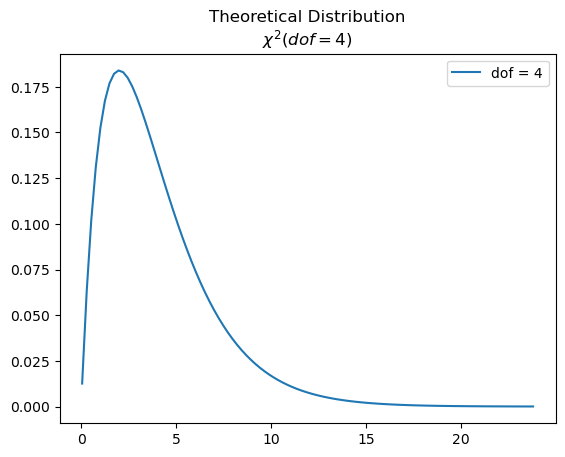

In [26]:
samplings.bartlett_stat(k = 5, ni = 10, n = 1000)

# package versions

In [2]:
import numpy
import pandas
import matplotlib
import time
import sklearn
import scipy
import IPython
import statsmodels
import mc

!python -V
print("IPython " + IPython.__version__)
print("numpy " + numpy.__version__)
print("sklearn " + sklearn.__version__)
print("scipy " + scipy.__version__)
print("statsmodels " + statsmodels.__version__)
print("matplotlib " + matplotlib.__version__)
print("mc-tk " + mc.__version__)

Python 3.9.12
IPython 8.4.0
numpy 1.21.0
sklearn 1.2.0
scipy 1.7.3
statsmodels 0.13.2
matplotlib 3.5.1
mc-tk 0.0.4


<br/><br/><br/><br/><br/><br/><br/><br/><hr/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

The following will be implemented in future versions.

## TODO: Levene's Test

Conover et al. (1981) examine many of the existing parametric and nonparametric tests by extensive simulations and they conclude that the tests proposed by Fligner and Killeen (1976) and Levene (1960) appear to be superior in terms of robustness of departures from normality and power

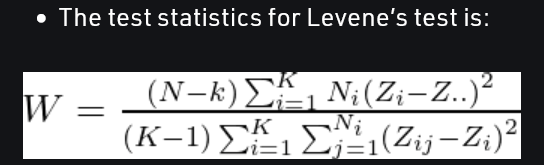

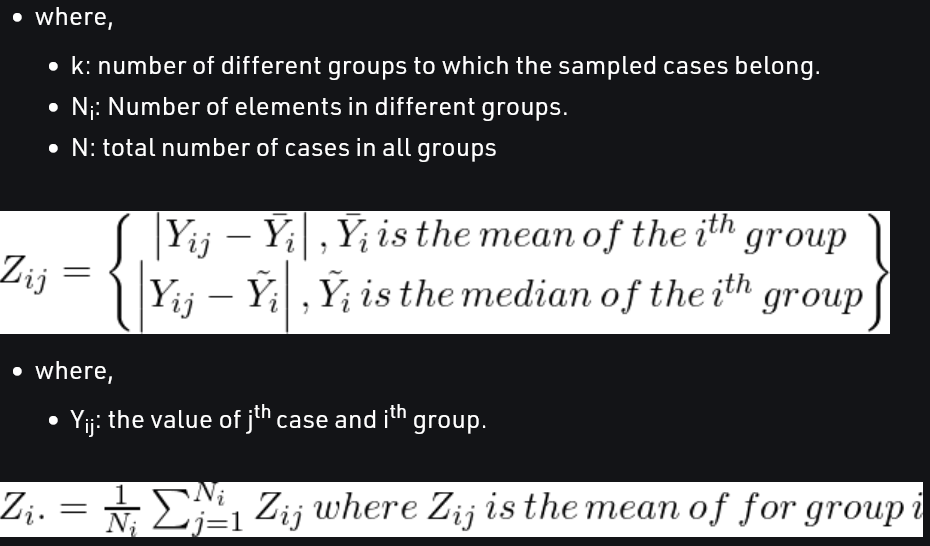

For skewed distribution, if the distribution is not clear we will use the median for test statistics.
For the symmetric distribution and moderately tailed distribution, we use mean value for distribution.

## TODO: Bartlett's Sphericity Test

Be aware that there are two tests that have Bartlett's name, and they are similar. The better-known test is Bartlett's test for equal variance, which is part of an ANOVA analysis. It tests the hypothesis that the variances across several groups are equal. The technical term is "homogeneity of variance," or HOV. The GLM procedure in SAS can perform Bartlett's test for homogeneity of variance. The documentation has a discussion and example that shows how to use Bartlett's HOV test.

Bartlett's sphericity test is different. Loosely speaking, the test asks whether a correlation matrix is the identity matrix. If so, the variables are uncorrelated, and you cannot perform a PCA to reduce the dimensionality of the data. More formally, Bartlett's sphericity test is a test of whether the data are a random sample from a multivariate normal population MVN(μ, Σ) where the covariance matrix Σ is a diagonal matrix. Equivalently, the variables in the population are MVN and uncorrelated. 

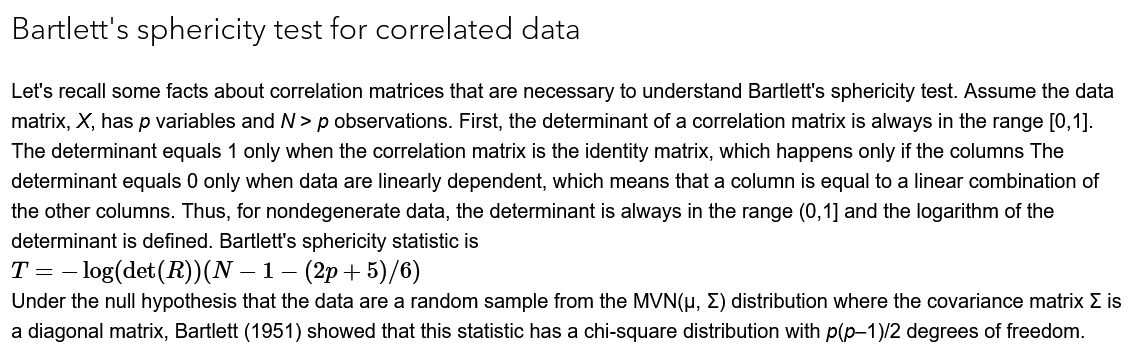

<hr/><br/><br/>